**pretrained embedding model**

In [36]:
import gensim
import pandas as pd
import gensim.downloader as api

In [ ]:
info= api.info()
for model_name, model_data in sorted(info["models"].items()):
  print(
      '%s (%d records): %s' % (
          model_name,
          model_data.get('num_records', -1),
          model_data['description'][:40] + '...'
      )
  )

__testing_word2vec-matrix-synopsis (-1 records): [THIS IS ONLY FOR TESTING] Word vecrors ...
conceptnet-numberbatch-17-06-300 (1917247 records): ConceptNet Numberbatch consists of state...
fasttext-wiki-news-subwords-300 (999999 records): 1 million word vectors trained on Wikipe...
glove-twitter-100 (1193514 records): Pre-trained vectors based on  2B tweets,...
glove-twitter-200 (1193514 records): Pre-trained vectors based on 2B tweets, ...
glove-twitter-25 (1193514 records): Pre-trained vectors based on 2B tweets, ...
glove-twitter-50 (1193514 records): Pre-trained vectors based on 2B tweets, ...
glove-wiki-gigaword-100 (400000 records): Pre-trained vectors based on Wikipedia 2...
glove-wiki-gigaword-200 (400000 records): Pre-trained vectors based on Wikipedia 2...
glove-wiki-gigaword-300 (400000 records): Pre-trained vectors based on Wikipedia 2...
glove-wiki-gigaword-50 (400000 records): Pre-trained vectors based on Wikipedia 2...
word2vec-google-news-300 (3000000 records): Pre-trai

In [ ]:
w2v = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
glove = api.load('glove-twitter-50')

[==================================================] 100.0% 199.5/199.5MB downloaded


In [ ]:
fasttext = api.load('fasttext-wiki-news-subwords-300')

[==================================================] 100.0% 958.5/958.4MB downloaded


In [ ]:
w2v.most_similar('tea')

[('Tea', 0.7009038329124451),
 ('teas', 0.6727380156517029),
 ('shape_Angius', 0.6323482990264893),
 ('activist_Jamie_Radtke', 0.5863860249519348),
 ('decaffeinated_brew', 0.5839536190032959),
 ('planter_bungalow', 0.575829029083252),
 ('herbal_tea', 0.5731174349784851),
 ('coffee', 0.5635291934013367),
 ('jasmine_tea', 0.548339307308197),
 ('Tea_NASDAQ_PEET', 0.5402544140815735)]

In [39]:
glove.most_similar('king')

[('prince', 0.8582577109336853),
 ('jack', 0.8346864581108093),
 ('aka', 0.832629382610321),
 ('mr.', 0.807805061340332),
 ('the', 0.8043431043624878),
 ('john', 0.8034776449203491),
 ("'s", 0.7829488515853882),
 ('jackson', 0.7796576619148254),
 ('from', 0.779649019241333),
 ('legend', 0.7787959575653076)]

In [ ]:
fasttext.most_similar('tea')

In [ ]:
w2v.distance('tea','coffee')

In [40]:
glove.distance('tea','pea')

0.5254092812538147

In [41]:
w2v.most_similar(positive=['king','woman'],negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

In [ ]:
w2v.most_similar(positive=['restaurant','cocktail'],negative=['dinner'])

In [ ]:
#!pip install gensim
!pip install python-levenshtein

Dataset:
**Reddit World News**

https://www.kaggle.com/datasets/rootuser/worldnews-on-reddit

# New section

In [11]:
df = pd.read_csv("/content/reddit_worldnews.csv")
df

,time_created,date_created,up_votes,down_votes,title,over_18,author,subreddit
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews
...,...,...,...,...,...,...,...,...
509231,1479816764,2016-11-22,5,0,Heil Trump : Donald Trump s alt-right white...,False,nonamenoglory,worldnews
509232,1479816772,2016-11-22,1,0,There are people speculating that this could b...,False,SummerRay,worldnews
509233,1479817056,2016-11-22,1,0,Professor receives Arab Researchers Award,False,AUSharjah,worldnews
509234,1479817157,2016-11-22,1,0,Nigel Farage attacks response to Trump ambassa...,False,smilyflower,worldnews


In [12]:
df.shape

(509236, 8)

**Simple Preprocessing & Tokenization**

The first thing to do for any data science task is to clean the data. For NLP, we apply various processing like converting all the words to lower case, trimming spaces, removing punctuations. This is something we will do over here too.

Additionally, we can also remove stop words like 'and', 'or', 'is', 'the', 'a', 'an' and convert words to their root forms like 'running' to 'run'.

In [46]:
df.title
#gensim.utils.simple_preprocess("Scores killed in Pakistan clashes")

,title
0,Scores killed in Pakistan clashes
1,Japan resumes refuelling mission
2,US presses Egypt on Gaza border
3,Jump-start economy: Give health care to all
4,Council of Europe bashes EU&UN terror blacklist
...,...
509231,Heil Trump : Donald Trump s alt-right white...
509232,There are people speculating that this could b...
509233,Professor receives Arab Researchers Award
509234,Nigel Farage attacks response to Trump ambassa...


In [ ]:
gensim.utils.simple_preprocess("Scores killed in Pakistan clashes")

In [45]:
news_title = df.title.apply(gensim.utils.simple_preprocess)
news_title

,title
0,"[scores, killed, in, pakistan, clashes]"
1,"[japan, resumes, refuelling, mission]"
2,"[us, presses, egypt, on, gaza, border]"
3,"[jump, start, economy, give, health, care, to,..."
4,"[council, of, europe, bashes, eu, un, terror, ..."
...,...
509231,"[heil, trump, donald, trump, alt, right, white..."
509232,"[there, are, people, speculating, that, this, ..."
509233,"[professor, receives, arab, researchers, award]"
509234,"[nigel, farage, attacks, response, to, trump, ..."


In [19]:
news_title.loc[0]

['scores', 'killed', 'in', 'pakistan', 'clashes']

**Training the Word2Vec Model**


Train the model for reviews. Use a window of size 10 i.e. 2 words before the present word and 2 words ahead. A sentence with at least 2 words should only be considered, configure this using min_count parameter.

Workers define how many CPU threads to be used.

In [20]:
model = gensim.models.Word2Vec(
    window=10,
    min_count=2,
    workers=4,
)

**Build Vocabulary**

In Gensim, the **build_vocab function** is part of the Word2Vec, or other similar models. This function is used to build the vocabulary for the model from a given corpus. The vocabulary contains all the unique tokens (words) in the corpus, along with their frequency, and prepares the model for training.

In [23]:
model.build_vocab(news_title, progress_per=100)

In [47]:
model.epochs

5

In [25]:
model.corpus_count

509236

**Train the Word2Vec Model:**

*total_examples=model.corpus_count:*

total_examples specifies the number of sentences (or documents) in your training corpus.
By setting total_examples=model.corpus_count, you are telling the model to use the total number of sentences already counted during the build_vocab step.

*epochs=model.epochs:*

epochs is the number of times the training process will iterate over the entire corpus.
By setting epochs=model.epochs, you are using the number of epochs defined when you initialized the model. You can customize this value if needed.

In [26]:
model.train(news_title, total_examples=model.corpus_count, epochs=model.epochs)

(30323131, 35114280)

**Save the Model**

Save the model so that it can be reused in other applications

In [27]:
model.save("/content/word2vec_news_title.model")

In [ ]:
#model = gensim.models.Word2Vec.load("/content/word2vec_news_title.model")

In [48]:
# Example: Access the vector for a specific word
print(model.wv['tea'])

[-0.04085952 -0.12789111 -0.01589017 -0.7085772   0.52904165 -0.60019946
 -0.21551335 -0.14660555 -0.13643295  0.24102366  0.13087244 -0.36346206
 -0.36862686  0.43499365  0.24462432 -0.11038085  0.45268226 -0.20643912
  0.20001335 -0.5806406   1.4206418  -0.4106742   0.49891174 -0.35645968
 -0.03660118  0.32833606  0.03226447  0.32842606  0.80809385  0.05291649
  0.6388708  -0.16327925  0.02724441 -0.24156322 -0.44064802  0.64569277
  0.41180602  0.57006633  0.14922509 -0.5346526   0.93250203  0.42382318
 -0.35463202 -0.09727167 -0.5731636  -1.0146161  -0.1631945  -0.06262703
 -0.4823177  -0.12831046 -0.1200787   0.21625836  0.8263668  -0.67963
  0.6323906  -0.53348243  0.23192614  0.7525379   0.04278276 -0.15676336
  1.0072967   0.1328037   0.5410972   0.4013499   1.2011942   0.10907505
  0.18342027 -0.22155175 -0.42906994 -0.23732685 -0.7977779  -0.52784634
  0.7664885  -0.9154724   0.08651323 -0.06426943  0.01401342 -0.40155286
  0.56445134  0.72438097  0.7558859  -0.26108757  0.13

**Finding Similar Words and Similarity between words**

https://radimrehurek.com/gensim/models/word2vec.html

In [49]:
model.wv.most_similar("girl")

[('boy', 0.8870277404785156),
 ('woman', 0.8498310446739197),
 ('teen', 0.7942448854446411),
 ('teenager', 0.7823588252067566),
 ('schoolgirl', 0.762632429599762),
 ('bride', 0.7618972659111023),
 ('mother', 0.7531858682632446),
 ('herself', 0.7349751591682434),
 ('man', 0.7339974045753479),
 ('girls', 0.7181392312049866)]

In [32]:
model.wv.similarity(w1="cheap", w2="inexpensive")

0.4288567

In [ ]:
model.wv.similarity(w1="great", w2="good")

0.46991843

**Visualizing the model**


In [35]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA


**Extract Word Vectors**

Extract the word vectors and corresponding words:

In [33]:
# Get all word vectors from the model
word_vectors = model.wv

# Extract the vocabulary
words = list(word_vectors.index_to_key)

**Reduce Dimensionality**

Use **t-SNE** or **PCA** to reduce the dimensionality of the vectors:

**t-SNE vs. PCA:**

t-SNE provides better visualization for capturing local relationships (clusters), but it is slower.
PCA is faster and better for an overall "big picture" but may lose finer clustering details.

**Perplexity (t-SNE):**

Tweak perplexity (usually between 5 and 50) for better clustering results depending on your data size.

In [34]:
# Extract vectors for the words in the vocabulary
vectors = word_vectors[words[:10]]

# Reduce dimensions with t-SNE
tsne = TSNE(n_components=2, random_state=6, perplexity=5, n_iter=250)
reduced_vectors = tsne.fit_transform(vectors)


NameError: name 'TSNE' is not defined

**Plot the Vectors**

Plot the 2D points and label them with their corresponding words:

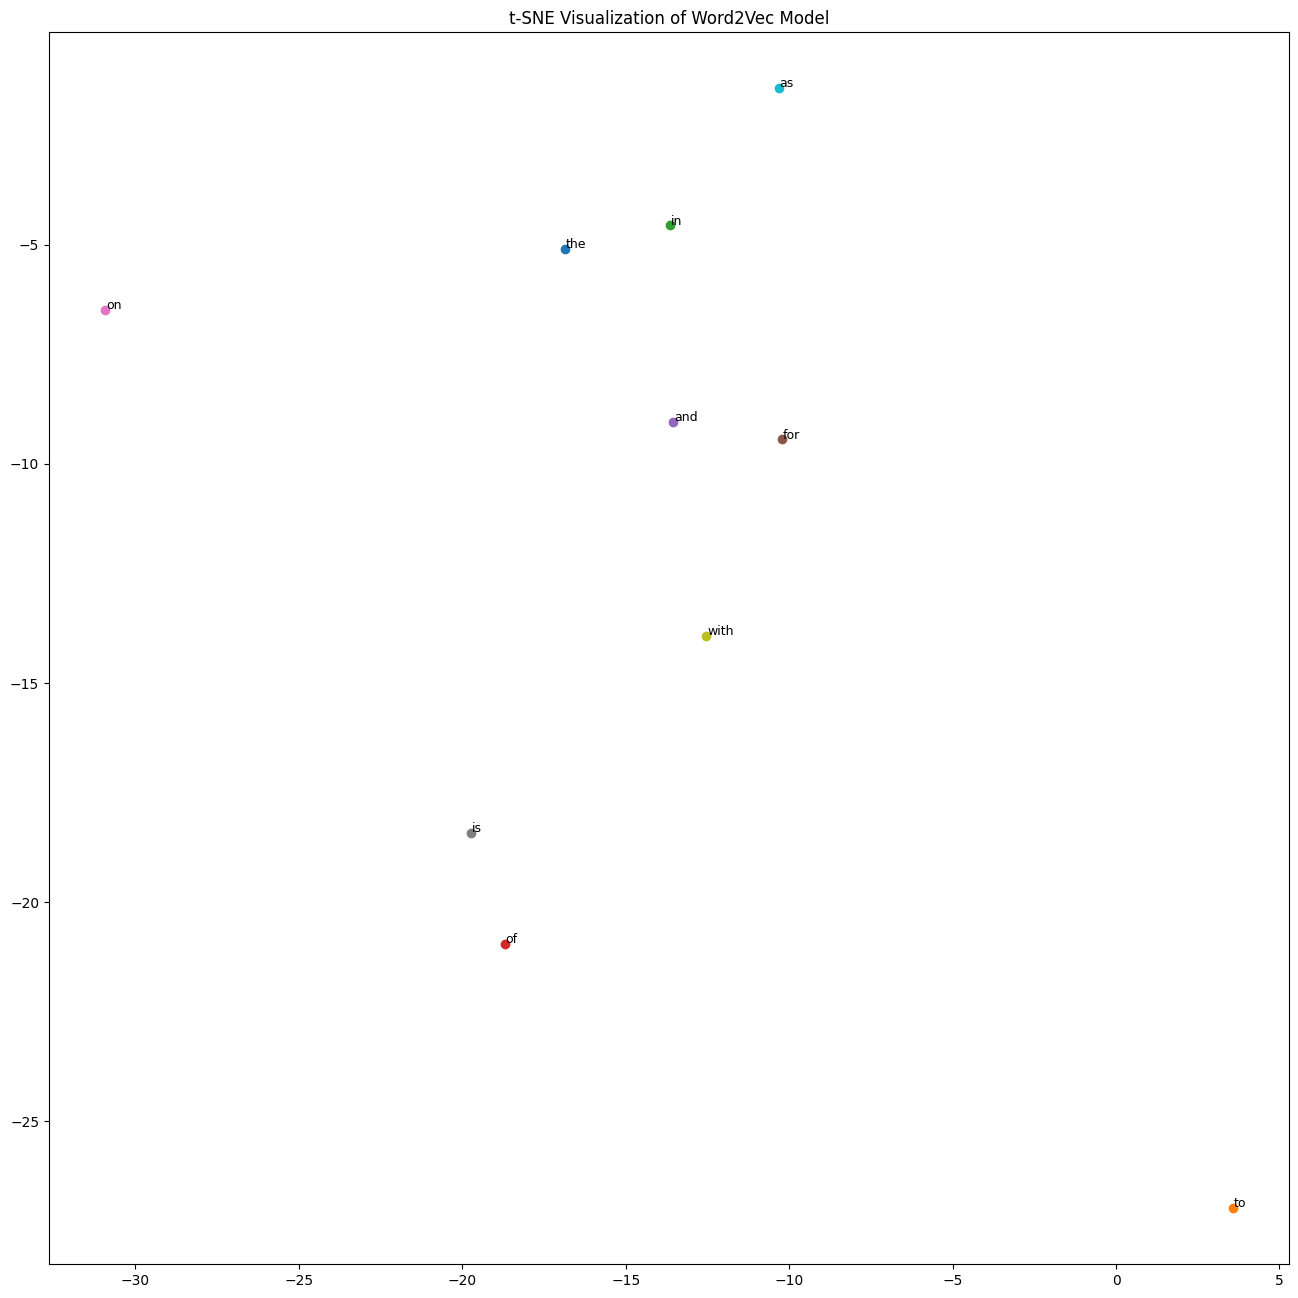

In [ ]:
# Create a scatter plot
plt.figure(figsize=(16, 16))
for i, word in enumerate(words[:10]):  # Limit to 100 words for clarity
    x, y = reduced_vectors[i]
    plt.scatter(x, y)
    plt.text(x + 0.02, y + 0.02, word, fontsize=9)

plt.title("t-SNE Visualization of Word2Vec Model")
plt.show()

# New section

**Using PCA (Faster than t-SNE)**

If you have a very large vocabulary, you can use PCA for faster dimensionality reduction:

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# Reduce dimensions with PCA
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)

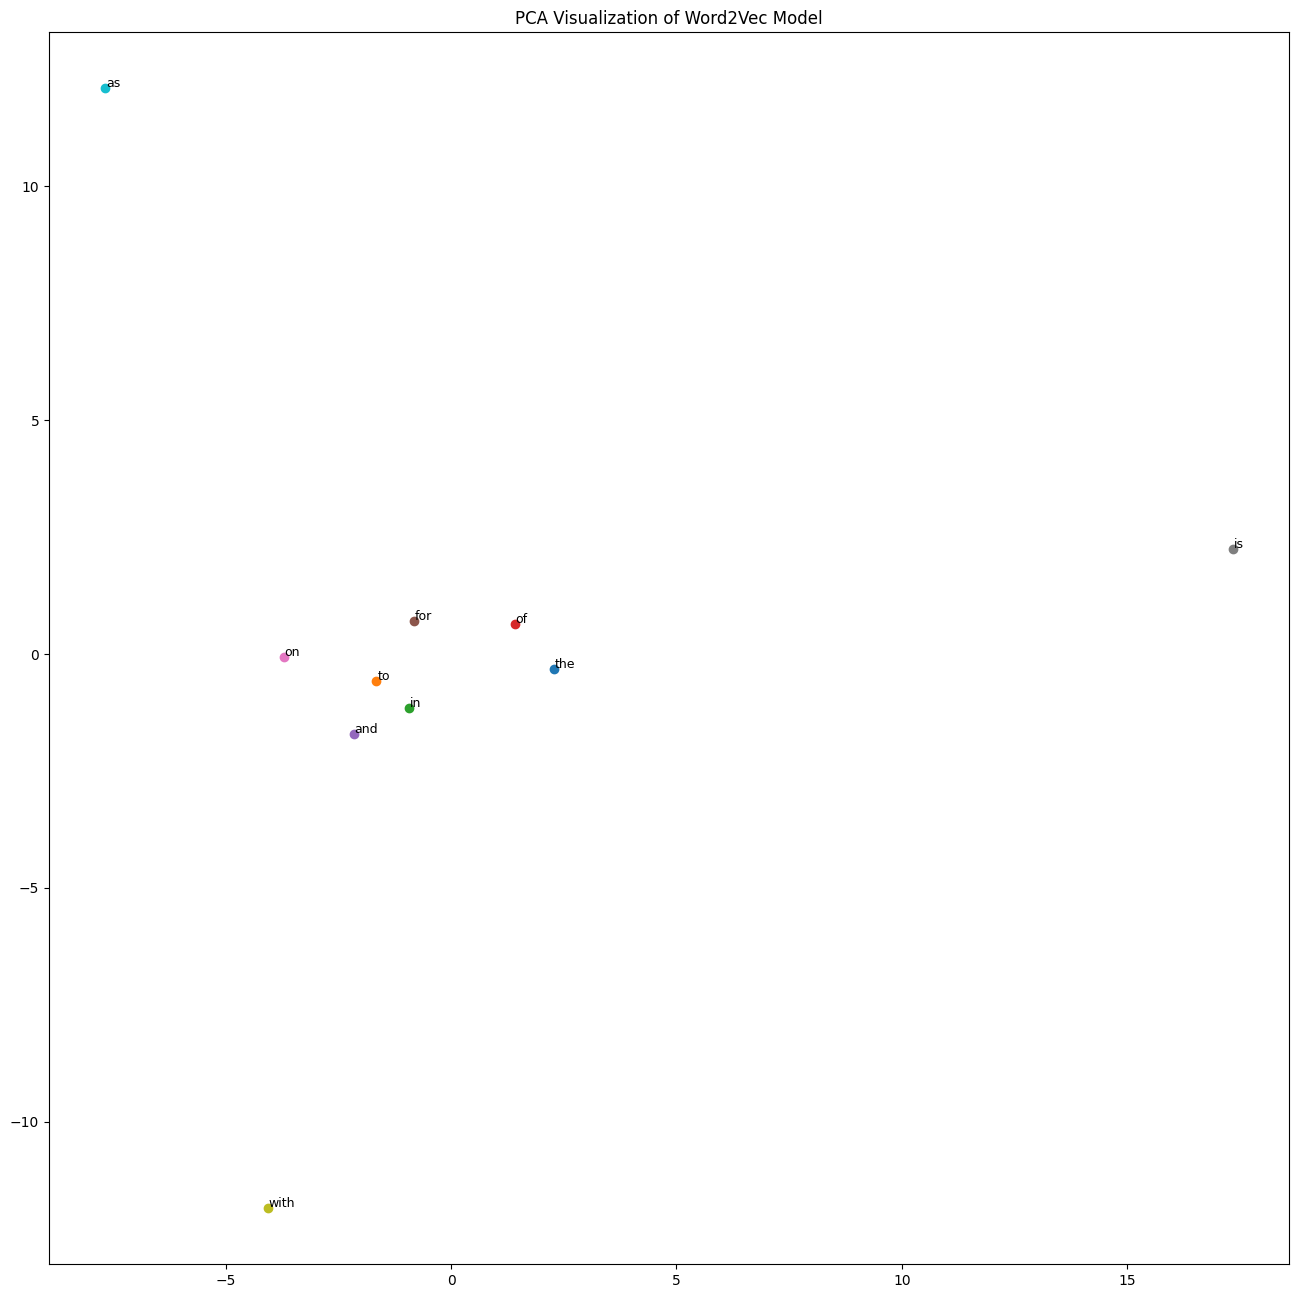

In [ ]:
# Plotting
plt.figure(figsize=(16, 16))
for i, word in enumerate(words[:10]):  # Plot only the first 100 words for clarity
    x, y = reduced_vectors[i]
    plt.scatter(x, y)
    plt.text(x + 0.02, y + 0.02, word, fontsize=9)
plt.title("PCA Visualization of Word2Vec Model")
plt.show()